In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

## Import modules from parent and multimode expts

In [3]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Parent Path: c:\_Lib\python\multimode_expts


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [5]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# Exp path

In [7]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


In [8]:
from dataset import *
from dataset import storage_man_swap_dataset
import os 

file_name = '\\man1_storage_swap_dataset.csv'
file_path = parent_path + file_name

ds_stor_man_swap = storage_man_swap_dataset(file_path)

In [9]:
ds_stor_man_swap.df

,stor_name,freq (MHz),precision (MHz),pi (mus),h_pi (mus),gain (DAC units),last_update
0,M1-S1,349.415,0.010,0.977143,0.488571,3000,2024-10-26 17:42:46.915401
1,M1-S2,520.925,0.010,1.130904,0.565452,5000,2024-10-26 17:43:09.376354
2,M1-S3,696.665,0.010,1.333910,0.666955,9000,2024-10-26 17:43:34.019332
3,M1-S4,875.845,0.010,1.254287,0.627144,9000,2024-10-26 17:43:51.867832
4,M1-S5,1053.395,0.010,1.973198,0.986599,7500,2024-10-26 17:44:14.975970
5,M1-S6,1245.160,0.010,1.595310,0.797655,13500,2024-10-26 17:44:34.143253
6,M1-S7,1423.040,0.010,1.685008,0.842504,13500,2024-10-26 17:44:51.587301
7,M1-S8,-1.000,-1.000,-1.000000,-1.000000,-1,51:31.3
8,M1-S9,-1.000,-1.000,-1.000000,-1.000000,-1,51:31.3
9,M1-S10,-1.000,-1.000,-1.000000,-1.000000,-1,51:31.3


In [10]:
# load BS data frame (without spectators)
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'DualRail_BeamSplitters.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Load the data
df_bs = pd.read_csv(file_path)
df_bs

,Mode,file_list,name,fids_list,fids_post_list,fid,fid_err,fid_post,fid_post_err,Depth fit up to,...,ge_list,eg_list,ee_list,gg_list_err,ge_list_err,eg_list_err,ee_list_err,ebars_list,ebars_post_list,depth_fit_up_to
0,1,"[548, 549, 550, 551, 552, 553, 554, 555, 556, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.933563187108675, 0.92539176866761, 0.908718...","[0.994865836316126, 0.993013098261554, 0.99046...",0.996652,0.000072,0.998779,0.000169,2000,...,"[0.9085502306183065, 0.9057903676411931, 0.887...","[0.004686333863849433, 0.00637849709117257, 0....","[0.06175047902747567, 0.06822973424121748, 0.0...","[0.0018465746795619019, 0.0015659177897998028,...","[0.0018465746795619019, 0.0015659177897998028,...","[0.0004359989629942819, 0.0006174559521902646,...","[0.0015981747296314585, 0.0018304495944191988,...","[0.0016098005294681022, 0.0018226997647139613,...","[0.0004799021448033312, 0.0006728531999346926,...",2000
1,2,"[569, 570, 571, 572, 573, 574, 575, 576, 577, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.9356514245251336, 0.9242189803653471, 0.914...","[0.9950886744818882, 0.9935122956231536, 0.991...",0.997613,0.000013,0.999754,0.000101,2000,...,"[0.8957272139719534, 0.8840266115577843, 0.873...","[0.0044322282288122945, 0.005776719908511158, ...","[0.05991634724605409, 0.07000429972614167, 0.0...","[0.0022832745775030047, 0.0018772482133232158,...","[0.0022832745775030047, 0.0018772482133232158,...","[0.00043983346018930907, 0.0004906753514151476...","[0.0018721113801848717, 0.001540946897328571, ...","[0.0016098005294681022, 0.0018226997647139613,...","[0.00048243060740322136, 0.0005523446792671511...",2000
2,3,"[590, 591, 592, 593, 594, 595, 596, 597, 598, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.932848556683558, 0.9184909395360339, 0.9043...","[0.9953260202637892, 0.9926657260845021, 0.991...",0.997000,0.000019,0.999229,0.000145,2000,...,"[0.8890630812784109, 0.8752246533122903, 0.861...","[0.0041724998020788145, 0.006467488235228106, ...","[0.06297894351436314, 0.07504157222873784, 0.0...","[0.0019511508849668908, 0.002034707201115821, ...","[0.0019511508849668908, 0.002034707201115821, ...","[0.0003559383392788671, 0.0005238370770952343,...","[0.001176226769595588, 0.001570598764562083, 0...","[0.0018364832264220945, 0.0014975954861458222,...","[0.00039949444035114164, 0.0005909073629860316...",2000
3,4,"[611, 612, 613, 614, 615, 616, 617, 618, 619, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.9224996506107835, 0.8977564150549788, 0.877...","[0.9924848735561859, 0.9889322008290996, 0.985...",0.993877,0.000050,0.996009,0.000355,2000,...,"[0.8953524548427165, 0.8707604852155324, 0.853...","[0.006783837945321119, 0.00973645686574578, 0....","[0.07071651144389529, 0.0925071280792755, 0.10...","[0.0021139916294548116, 0.0021486621308964065,...","[0.0021139916294548116, 0.0021486621308964065,...","[0.0005176444615874594, 0.0006221573958370889,...","[0.0016800866418539158, 0.0019553545429684908,...","[0.0018364832264220945, 0.0014975954861458222,...","[0.0005700234403086111, 0.0007143665655444077,...",2000
4,5,"[632, 633, 634, 635, 636, 637, 638, 639, 640, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.924224701154291, 0.8972516351072528, 0.8680...","[0.994061657262647, 0.9914303178857917, 0.9861...",0.993209,0.000068,0.997944,0.000094,2000,...,"[0.9077750642910327, 0.8827509904350767, 0.851...","[0.0054231752960300465, 0.007617899645197445, ...","[0.07035212354967885, 0.0951304652475498, 0.11...","[0.001587489521038847, 0.0023662620250462256, ...","[0.001587489521038847, 0.0023662620250462256, ...","[0.00041051773797976297, 0.0006694071490576667...","[0.0012095062061867597, 0.0021735478521388344,...","[0.0012115656976351553, 0.001564185678578712, ...","[0.00045023043163391213, 0.0007583637132156032...",2000
5,6,"[653, 654, 655, 656, 657, 658, 659, 660, 661, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.890094859149635, 0.8900864880228737

# Cross Kerrs

In [12]:
cross_kerrs = [[ 0.00000000e+00, 2.69516637e-04, 1.26486438e-04, 8.86845176e-05, 4.26936404e-05, 1.94041328e-05, -1.95956248e-05], [-1.77543592e-04, 0.00000000e+00, -6.92266452e-05, -7.10978126e-05, 1.37913777e-05, -2.56223707e-05, 9.10903529e-07], [-7.56355942e-05, -4.42189013e-05, 0.00000000e+00, -2.45449305e-05, -4.28864355e-06, 2.24512793e-06, -3.33552244e-06], [ 6.10648017e-05, 4.56428583e-05, 1.96973208e-05, 0.00000000e+00, 2.41548015e-06, -1.08904643e-05, -6.20592017e-06], [-3.72488668e-05, -4.62192947e-05, -3.77809419e-05, -1.58034621e-05, 0.00000000e+00, -2.52649638e-05, -2.20498490e-06], [-4.31597553e-05, -1.65832342e-05, -4.06943788e-05, 1.21448311e-05, -1.92766876e-05, 0.00000000e+00, 1.27297852e-05], [-5.42085347e-06, -3.00407857e-05, -7.10933782e-06, -2.45232181e-05, 8.53857371e-06, -1.07023464e-05, 0.00000000e+00]]
cross_kerrs = np.array(cross_kerrs)
print(cross_kerrs)

[[ 0.00000000e+00  2.69516637e-04  1.26486438e-04  8.86845176e-05
   4.26936404e-05  1.94041328e-05 -1.95956248e-05]
 [-1.77543592e-04  0.00000000e+00 -6.92266452e-05 -7.10978126e-05
   1.37913777e-05 -2.56223707e-05  9.10903529e-07]
 [-7.56355942e-05 -4.42189013e-05  0.00000000e+00 -2.45449305e-05
  -4.28864355e-06  2.24512793e-06 -3.33552244e-06]
 [ 6.10648017e-05  4.56428583e-05  1.96973208e-05  0.00000000e+00
   2.41548015e-06 -1.08904643e-05 -6.20592017e-06]
 [-3.72488668e-05 -4.62192947e-05 -3.77809419e-05 -1.58034621e-05
   0.00000000e+00 -2.52649638e-05 -2.20498490e-06]
 [-4.31597553e-05 -1.65832342e-05 -4.06943788e-05  1.21448311e-05
  -1.92766876e-05  0.00000000e+00  1.27297852e-05]
 [-5.42085347e-06 -3.00407857e-05 -7.10933782e-06 -2.45232181e-05
   8.53857371e-06 -1.07023464e-05  0.00000000e+00]]


# Mode Bare Ramsey Dataset

In [13]:
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'ModeT2s_and_echoes.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
df_t2_and_echo = pd.read_csv(file_path)

print(f"DataFrame read from to {file_path}")

DataFrame read from to H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\ModeT2s_and_echoes.csv


In [14]:
df_t2_and_echo

,target,type,file_no,name,t2,t2_err,return_args
0,1,T2,90,_stor_cavity_ramsey_sweep.h5,235.687931,7.102034,"[[1.8099999999999998, 3.6099999999999994, 5.40..."
1,1,T2_echo,91,_stor_cavity_ramsey_sweep.h5,551.567706,16.846464,"[[3.02, 6.02, 9.02, 12.02, 15.02, 18.02, 21.02..."
2,2,T2,92,_stor_cavity_ramsey_sweep.h5,378.310633,15.076063,"[[6.01, 12.01, 18.01, 24.01, 30.01, 36.01, 42...."
3,2,T2_echo,93,_stor_cavity_ramsey_sweep.h5,1493.194215,53.469139,NaN
4,3,T2,94,_stor_cavity_ramsey_sweep.h5,677.194120,16.847612,"[[4.81, 9.61, 14.409999999999998, 19.21, 24.01..."
5,3,T2_echo,95,_stor_cavity_ramsey_sweep.h5,1309.914525,41.804243,"[[8.02, 16.02, 24.02, 32.02, 40.02, 48.02, 56...."
6,4,T2,96,_stor_cavity_ramsey_sweep.h5,806.227803,23.684860,"[[4.21, 8.41, 12.610000000000001, 16.810000000..."
7,4,T2_echo,97,_stor_cavity_ramsey_sweep.h5,972.376941,29.846202,"[[7.02, 14.02, 21.02, 28.02, 35.02, 42.02, 49...."
8,5,T2,98,_stor_cavity_ramsey_sweep.h5,591.843259,15.246132,"[[3.6099999999999994, 7.209999999999999, 10.80..."
9,5,T2_echo,99,_stor_cavity_ramsey_sweep.h5,663.338928,22.742345,"[[6.02, 12.02, 18.02, 24.02, 30.02, 36.02, 42...."


# Analyze Many body dephasing data

## Open Dataframe

In [19]:
# open dataframe
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'ManyBodyDephasing.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
df_MBD = pd.read_csv(file_path)

print(f"DataFrame read from to {file_path}")

DataFrame read from to H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\ManyBodyDephasing.csv


## Applying analysis 

In [15]:

# mode_no = 1
# spectator_cross_kerrs = np.abs(cross_kerrs[mode_no-1])
# kappa = np.sum(1/T1s * np.abs(spectator_cross_kerrs/np.sum(spectator_cross_kerrs)))
# print('effective spectator T1: ', 1/kappa)

In [44]:
import ast 

def fix_formatting(data, type='p'): 
    '''
    When saving np.arrays in a csv file, all arrays become strings. This function converts them back to arrays.

    Each type is manually calibrated and then applied to all data of that type.
    '''
    if type == 'p':
        return ast.literal_eval(data.replace('  ', ',').replace('\n ', ',').replace(' -', ',-'))
    
    elif type == 'pCov':
        return ast.literal_eval( data.replace('  ', ',').replace('\n ', ',').replace(' -', ',-'))
    
    elif type == 'xdata':
        data = data.replace('   ', ',').replace('  ', ',').replace(' ', ',').replace('\n', '')
        ## remove the first comma
        data = '[' + data[2:]
        return np.array(ast.literal_eval(data))
    
    elif type == 'idata':
        return np.array(ast.literal_eval(data))
        
    

In [53]:
df_MBD

,Unnamed: 0.1,Unnamed: 0,target,state_idx,file_no,name,t2,t2_err,p,pCov,xdata,idata,return_args
0,0,0,1,0,90,_stor_cavity_ramsey_sweep.h5,278.042230,10.884967,[ 3.24240150e+02 2.80972092e-02 -3.74620490e+...,[[ 1.09038088e+16 -9.54145116e+01 3.11069106e...,[ 1.81 3.61 5.41 7.21 9.01 10.81 12...,"[-132.15446674537586, -81.4926948051948, -25.3...",NaN
1,1,1,1,1,22,_stor_cavity_ramsey_sweep.h5,290.866341,13.154786,[ 3.17205254e+02 2.81728391e-02 -4.34467770e+...,[[ 1.15052670e+16 8.32883738e+01 -2.68473223e...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-134.0004214852085, -86.87475864257942, -30.3...",NaN
2,2,2,1,2,23,_stor_cavity_ramsey_sweep.h5,260.005531,9.453510,"[352.61802854947564, 0.02252252252252253, -53....",[[inf inf inf inf inf inf]\n [inf inf inf inf ...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-128.49311135112353, -95.4091829223408, -55.4...",NaN
3,3,3,1,3,24,_stor_cavity_ramsey_sweep.h5,285.860033,12.445693,[ 2.98245751e+02 2.77988125e-02 -4.43351771e+...,[[ 1.34342862e+16 -1.15520991e+02 1.90671907e...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-137.93075129738415, -83.48585016593066, -20....",NaN
4,4,4,1,4,25,_stor_cavity_ramsey_sweep.h5,253.318176,10.196474,"[382.4504166493798, 0.02252252252252253, 59.50...",[[inf inf inf inf inf inf]\n [inf inf inf inf ...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-142.45235487404165, -111.91995732462264, -26...",NaN
5,5,5,1,5,26,_stor_cavity_ramsey_sweep.h5,281.408727,11.610525,[ 2.93444476e+02 2.78841355e-02 -4.88712750e+...,[[ 7.76562395e+15 1.47040584e+02 -5.77985856e...,[ 1.51 3.01 4.51 6.01 7.51 9.01 10...,"[-141.12335001064508, -85.12480121918897, -27....",NaN
6,6,6,2,0,92,_stor_cavity_ramsey_sweep.h5,435.249214,17.516631,[ 3.37600375e+02 9.27565314e-03 1.35714631e+...,[[ 1.49710288e+16 -8.38181627e+01 8.60808244e...,[ 6.01 12.01 18.01 24.01 30.01 36.01 42...,"[3.4405705856010123, -45.609278879015726, -131...",NaN
7,7,7,2,1,30,_stor_cavity_ramsey_sweep.h5,480.860541,14.388364,[ 3.43782520e+02 9.30490906e-03 1.30964766e+...,[[ 3.47693459e+01 5.33715223e-07 -3.62759335e...,[ 5.01 10.01 15.01 20.01 25.01 30.01 35...,"[76.7657297339757, 34.58518767817549, -42.9902...",NaN
8,8,8,2,2,31,_stor_cavity_ramsey_sweep.h5,467.648602,21.497076,[ 2.77361608e+02 9.02182481e-03 1.19233027e+...,[[ 5.98011256e+01 -4.42052116e-06 4.37817552e...,[ 5.01 10.01 15.01 20.01 25.01 30.01 35...,"[79.25604201524446, 61.97823619469962, -19.346...",NaN
9,9,9,2,3,32,_stor_cavity_ramsey_sweep.h5,479.399206,17.607957,[ 3.12239323e+02 9.14896655e-03 1.28147621e+...,[[ 4.68575825e+01 -2.81721708e-07 3.75306936e...,[ 5.01 10.01 15.01 20.01 25.01 30.01 35...,"[96.05281077948422, 43.75738619832307, -27.001...",NaN


In [52]:
df_idx =4
file_no = df_MBD.loc[df_idx, 'file_no']
name = df_MBD.loc[df_idx, 'name']
mode_no = df_MBD.loc[df_idx, 'target']
state_idx = df_MBD.loc[df_idx, 'state_idx']

spectator_cross_kerrs = np.abs(cross_kerrs[mode_no-1])
# T1s = np.array([358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2])
# kappa = np.sum(1/T1s * np.abs(spectator_cross_kerrs/np.sum(spectator_cross_kerrs)))
# effective_spec_T1 = 1/kappa

if state_idx == 0:
    alpha =0
elif state_idx == 1:
    alpha = 1
else:
    alpha = 1/2

#xdata_1, idata1 = df_MBD.loc[df_idx, 'xdata'], df_MBD.loc[df_idx, 'idata']
#p, pCov = df_MBD.loc[df_idx, 'p'], df_MBD.loc[df_idx, 'pCov']

# fix formatting 
# if df_idx == 4: 
#     p = ast.literal_eval(df_MBD.loc[df_idx, 'p'])
# else:
p = fix_formatting(df_MBD.loc[df_idx, 'p'], type='p')
pCov = fix_formatting(df_MBD.loc[df_idx, 'pCov'], type='pCov')
xdata_1 = fix_formatting(df_MBD.loc[df_idx, 'xdata'], type='xdata')
idata1 = fix_formatting(df_MBD.loc[df_idx, 'idata'], type='idata')


#  # fitparams=[amp, freq (non-angular), phase (deg), decay time, amp offset, decay time offset]

#get rid of amp offset and amp 
idata1 = (idata1 - p[4])/p[0]
# plt.plot(xdata_1, idata1, '-o', label='original')

# get rid of internal kappa decay 

## find df_idx in the t2_and_echo dataframe with target being mode_no and type being T2
# t2_df_idx = df_t2_and_echo[(df_t2_and_echo['target'] == mode_no) & (df_t2_and_echo['type'] == 'T2')].index[0]
# t2 = df_t2_and_echo.loc[t2_df_idx, 't2']
t2_df_idx = df_MBD[(df_MBD['target'] == mode_no) & (df_MBD['state_idx'] == 0)].index[0]
t2 = df_MBD.loc[t2_df_idx, 't2']

factor = np.exp(xdata_1/t2)
idata1_ = np.array(idata1) * factor



# get rid of oscillations
# idata2_= idata1_/np.sin(p[1]*xdata_1 *2*np.pi +p[2]*np.pi/180)
# # remove outliers (things larger than 1)
# idata2_[idata2_>1] = 1
# idata2_[idata2_<-1] = -1

plt.plot(xdata_1, idata1, '-o', label='original')
plt.plot(xdata_1, idata1_, '-o', label='internal decay removed')
# plt.plot(xdata_1, idata2_, '-o', label='oscillations removed')
plt.legend()
p_ramsey = p.copy()


SyntaxError: invalid syntax (<unknown>, line 1)

In [51]:
df_MBD.loc[4, 'pCov']

'[[inf inf inf inf inf inf]\n [inf inf inf inf inf inf]\n [inf inf inf inf inf inf]\n [inf inf inf inf inf inf]\n [inf inf inf inf inf inf]\n [inf inf inf inf inf inf]]'

In [24]:
t2_df_idx = df_t2_and_echo[(df_t2_and_echo['target'] == mode_no) & (df_t2_and_echo['type'] == 'T2')].index[0]
t2 = df_t2_and_echo.loc[t2_df_idx, 't2']

df_MBD[(df_MBD['target'] == mode_no) & (df_MBD['state_idx'] == 0)].index[0]

6

In [58]:
p

[337.600375, 0.00927565314, 135.714631, 435.249214, -72.6105513, -127.389846]

In [54]:
data = df_MBD.loc[df_idx, 'xdata']
# data
data = data.replace('  ', ',').replace(' ', ',').replace('\n', '')
# remove the first comma
data = '[' + data[2:]
data

'[6.01,12.01,18.01,24.01,30.01,36.01,42.01,48.01,54.01,60.01,66.01,72.01,78.01,84.01,90.01,96.01,102.01,108.01,114.01,120.01,126.01,132.01,138.01,144.01,150.01,156.01,162.01,168.01,174.01,180.01,186.01,192.01,198.01,204.01,210.01,216.01,222.01,228.01,234.01,240.01,246.01,252.01,258.01,264.01,270.01,276.01,282.01,288.01,294.01,300.01,306.01,312.01,318.01,324.01,330.01,336.01,342.01,348.01,354.01,360.01,366.01,372.01,378.01,384.01,390.01,396.01,402.01,408.01,414.01,420.01,426.01,432.01,438.01,444.01,450.01,456.01,462.01,468.01,474.01,480.01,486.01,492.01,498.01,504.01,510.01,516.01,522.01,528.01,534.01,540.01,546.01,552.01,558.01,564.01,570.01,576.01,582.01,588.01,594.01,600.01,606.01,612.01,618.01,624.01,630.01,636.01,642.01,648.01,654.01,660.01,666.01,672.01,678.01,684.01,690.01,696.01,702.01,708.01,714.01,720.01,726.01,732.01,738.01,744.01,750.01,756.01,762.01,768.01,774.01,780.01,786.01,792.01,798.01,804.01,810.01,816.01,822.01,828.01,834.01,840.01,846.01,852.01,858.01,864.01,870.01,

In [19]:
df_MBD.loc[df_idx]

Unnamed: 0.1                                                    6
Unnamed: 0                                                      6
target                                                          2
state_idx                                                       0
file_no                                                        92
name                                 _stor_cavity_ramsey_sweep.h5
t2                                                     435.249214
t2_err                                                  17.516631
p               [ 3.37600375e+02  9.27565314e-03  1.35714631e+...
pCov            [[ 1.49710288e+16 -8.38181627e+01  8.60808244e...
xdata           [  6.01  12.01  18.01  24.01  30.01  36.01  42...
idata           [3.4405705856010123, -45.609278879015726, -131...
return_args                                                   NaN
Name: 6, dtype: object

In [39]:
df_MBD.loc[14, 'p']

'[ 2.63392819e+02  6.72847425e-03  1.19952121e+02  7.68118391e+02\n -2.52528322e+01 -2.40940262e+02]'

In [18]:
import ast 
ast.literal_eval(df_MBD.loc[df_idx, 'p'])

SyntaxError: invalid syntax (<unknown>, line 1)

In [36]:

data = '[ 3.37600375e+02  9.27565314e-03  1.35714631e+02  4.35249214e+02\n -7.26105513e+01 -1.27389846e+02]'

In [37]:
import ast 
data = data.replace('  ', ',').replace('\n ', ',').replace(' -', ',-')
# result = ast.literal_eval(data)
data

'[ 3.37600375e+02,9.27565314e-03,1.35714631e+02,4.35249214e+02,-7.26105513e+01,-1.27389846e+02]'

In [34]:
ast.literal_eval(data)

SyntaxError: invalid syntax (<unknown>, line 1)

In [373]:

file_no = df_MBD.loc[df_idx, 'file_no']
name = df_MBD.loc[df_idx, 'name']
temp_data, attrs = prev_data(expt_path, f'{file_no:05d}{name}')
print(f'{file_no:05d}{name}')
attrs['config']['expt']

00033_stor_cavity_ramsey_sweep.h5


{'start': 0.01,
 'step': 5.0,
 'expts': 201,
 'ramsey_freq': -2.93,
 'reps': 500,
 'rounds': 1,
 'qubits': [0],
 'checkEF': False,
 'f0g1_cavity': 0,
 'init_gf': False,
 'active_reset': True,
 'man_reset': True,
 'storage_reset': True,
 'user_defined_pulse': [False, 1977.7, 15000, 0.005, 0.550453, 0],
 'parity_meas': False,
 'man_idx': 1,
 'storage_ramsey': [True, 2, True],
 'coupler_ramsey': False,
 'custom_coupler_pulse': [[1435],
  [2000],
  [0.17234146839057687],
  [0],
  [3],
  ['flat_top'],
  [0.005]],
 'echoes': [False, 0],
 'prepulse': True,
 'postpulse': True,
 'pre_sweep_pulse': [[3568.1515953227604,
   3425.5564066067,
   2007.0,
   349.415,
   3568.1515953227604,
   3425.5564066067,
   2007.0,
   696.665,
   3568.1515953227604,
   3425.5564066067,
   2007.0,
   875.845,
   3568.1515953227604,
   3425.5564066067,
   2007.0,
   1053.395,
   3568.1515953227604,
   3425.5564066067,
   2007.0,
   1245.16,
   3568.1515953227604,
   3425.5564066067,
   2007.0,
   1423.04,
   3568.

In [380]:
print(attrs['config']['expt']['post_sweep_pulse'])

[[2007.0, 3425.5564066067, 3568.1515953227604], [15000, 8236, 5510], [0.6056817916987671, 0, 0], [0, 0, 0], [0, 2, 2], ['flat_top', 'g', 'g'], [0.005, 0.035, 0.035]]


In [355]:
alpha

0.5

In [291]:
alpha

0.5

### Fitting only kappam


$f(t) = e^{-\kappa_{int} t} e^{\alpha e^{-\kappa_{s} t} \kappa_m t}$ cos($\omega t$)

where 
- $\kappa_{int}$ is the intrinsic dephasing rate (T2)
- $\kappa_{s}$ is the T1 decay (average) of spectator storage modes
- $\kappa_m$ is the effective many body dephasing rate
- $\omega$ is the ramsey frequency
- $\alpha$ is the amount of photon prepared per storage mode

In [265]:
effective_spec_T1

1151.791633849051

In [302]:
mode_no

2

In [335]:
T1s = [358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2]
T1s_eff = []
for idx, T1 in enumerate(T1s):
    if idx == mode_no-1:
        pass
    else:
        T1s_eff.append(T1)
T1s_eff = np.array(T1s_eff)
T1s_eff

array([358.3, 799. , 597.4, 355.7, 589.5, 371.2])

In [343]:

def many_body_dephasing_func(x, *p, args = [0.9, 0, alpha,np.mean(T1s_eff), p_ramsey[1], p_ramsey[2]]):
    '''f(t) = yscale * sin(2*pi*freq*t + phase) * exp(-alpha * exp(-t/decay_T1) * t/decay_mbd)'''
    decay_mbd = p
    yscale, x0, alpha, decay_T1, freq, phase_deg = args
    return yscale * (np.sin(2 * np.pi * freq * x + phase_deg * np.pi / 180) 
                     * np.exp(-1* alpha* np.exp(-1* (x - x0) / decay_T1) * (x - x0) / decay_mbd))

def fit_many_body_dephasing(xdata, ydata, fitparams=None, bounds=(-np.inf, np.inf)):
    if fitparams is None:
        fitparams = [np.max(ydata), 1000, 1000, 0.1, 0, 0]

    try:
        # print(fitparams)
        # print(xdata.shape, ydata.shape)
        # print(bounds)
        avg_deviation = 1
        while avg_deviation > 0.2:
            pOpt, pCov = sp.optimize.curve_fit(many_body_dephasing_func, xdata, ydata, p0=fitparams, bounds=bounds, maxfev=10000)

            avg_deviation = np.mean(np.abs(ydata - many_body_dephasing_func(xdata, *pOpt)))
            # randomly perturb the initial guess with positive or negative
            fitparams = pOpt 
            print(avg_deviation)
            print(fitparams)
    except RuntimeError:
        print('Error - curve_fit failed')
        pOpt = fitparams
        pCov = np.zeros((len(fitparams), len(fitparams)))
    return pOpt, pCov

# Example usage
T2s = df_t2_and_echo[(df_t2_and_echo['type'] == 'T2')]['t2'].values

# Define bounds for the parameters
lower_bounds = [10]
upper_bounds = [ 5000]

# Fit the data with bounds
p_, pCov_ = fit_many_body_dephasing(xdata_1, idata1_, fitparams=[ 2000], bounds=(lower_bounds, upper_bounds))

0.12177145059538853
[1448.32612342]


decay_mbd:  1448.3261234233253 ± 126142548.40508004


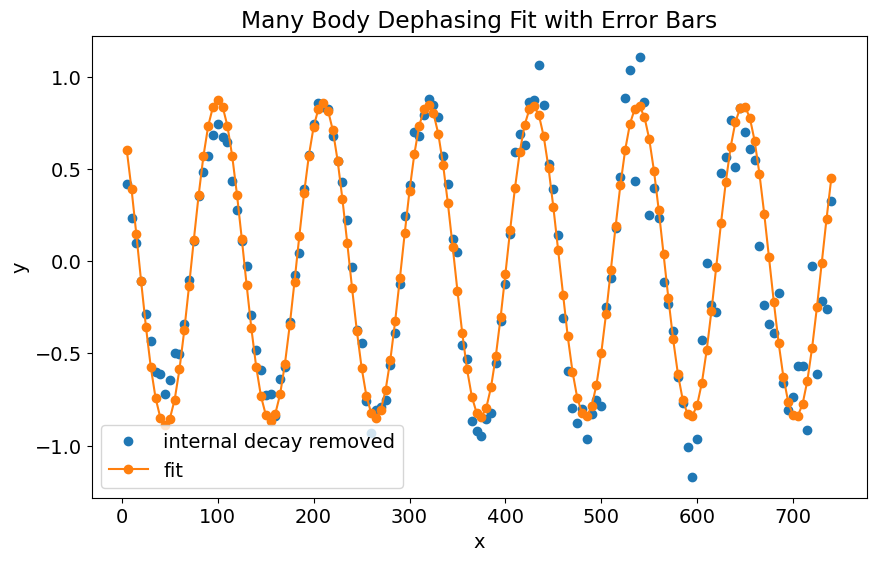

In [344]:
# Assuming pCov is the covariance matrix returned by curve_fit
# Extract the standard deviations (errors) of the parameters
p_errors = np.sqrt(np.diag(pCov))

# Plot the data with error bars
plt.plot(xdata_1, idata1_, 'o', label='internal decay removed')

# Plot the fit with error bars
plt.plot(xdata_1, many_body_dephasing_func(xdata_1, *p_), '-o', label='fit')

# Print all the parameters with their errors
# yscale, decay_T1, decay_mbd, freq, phase_deg, x0
# print('yscale: ', p_[0], '±', p_errors[0])
print('decay_mbd: ', p_[0], '±', p_errors[0])
# print('freq: ', p_[3], '±', p_errors[3])
# print('phase_deg: ', p_[4], '±', p_errors[4])
# print('x0: ', p_[2], '±', p_errors[2])

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Many Body Dephasing Fit with Error Bars')
plt.show()

### With yscale

In [327]:


def many_body_dephasing_func(x, *p, args = [0, alpha,np.mean(T1s_eff), p_ramsey[1], p_ramsey[2]]):
    '''f(t) = yscale * sin(2*pi*freq*t + phase) * exp(-alpha * exp(-t/decay_T1) * t/decay_mbd)'''
    yscale, decay_mbd= p
    x0, alpha, decay_T1, freq, phase_deg = args
    return yscale * (np.sin(2 * np.pi * freq * x + phase_deg * np.pi / 180) 
                     * np.exp(-1* alpha* np.exp(-1* (x - x0) / decay_T1) * (x - x0) / decay_mbd))

def fit_many_body_dephasing(xdata, ydata, fitparams=None, bounds=(-np.inf, np.inf)):
    if fitparams is None:
        fitparams = [np.max(ydata), 1000, 1000, 0.1, 0, 0]

    try:
        # print(fitparams)
        # print(xdata.shape, ydata.shape)
        # print(bounds)
        avg_deviation = 1
        while avg_deviation > 0.2:
            pOpt, pCov = sp.optimize.curve_fit(many_body_dephasing_func, xdata, ydata, p0=fitparams, bounds=bounds, maxfev=10000)

            avg_deviation = np.mean(np.abs(ydata - many_body_dephasing_func(xdata, *pOpt)))
            # randomly perturb the initial guess with positive or negative
            fitparams = pOpt 
            print(avg_deviation)
            print(fitparams)
    except RuntimeError:
        print('Error - curve_fit failed')
        pOpt = fitparams
        pCov = np.zeros((len(fitparams), len(fitparams)))
    return pOpt, pCov

# Example usage
T2s = df_t2_and_echo[(df_t2_and_echo['type'] == 'T2')]['t2'].values

# Define bounds for the parameters
lower_bounds = [0.3,10 ]
upper_bounds = [2,  50000000]

# Fit the data with bounds
p_, pCov_ = fit_many_body_dephasing(xdata_1, idata1_, fitparams=[1, 100], bounds=(lower_bounds, upper_bounds))

0.1182457769396848
[8.30421511e-01 5.00000000e+07]


yscale:  0.8304215112847372 ± 126142548.40508004
decay_mbd:  49999999.99999492 ± 1.1637626025694463e-05


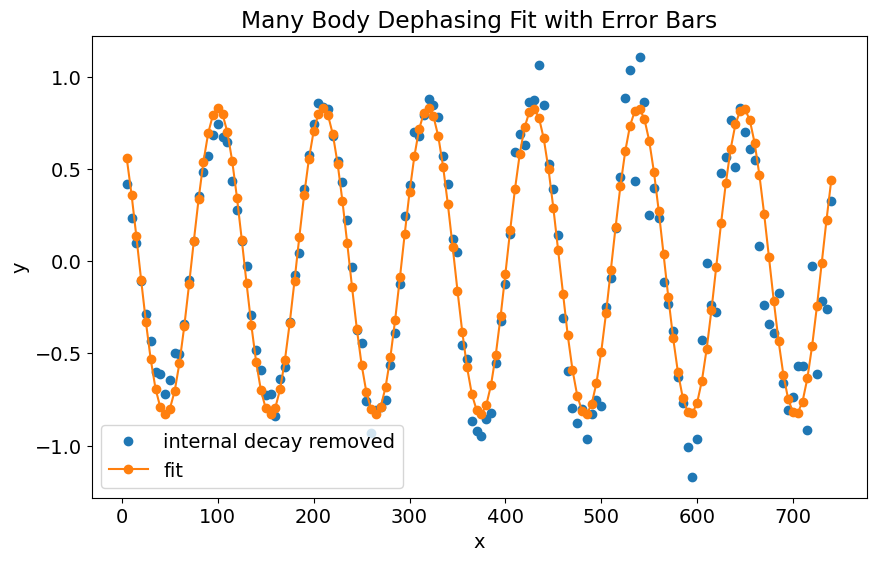

In [328]:
# Assuming pCov is the covariance matrix returned by curve_fit
# Extract the standard deviations (errors) of the parameters
p_errors = np.sqrt(np.diag(pCov))

# Plot the data with error bars
plt.plot(xdata_1, idata1_, 'o', label='internal decay removed')

# Plot the fit with error bars
plt.plot(xdata_1, many_body_dephasing_func(xdata_1, *p_), '-o', label='fit')

# Print all the parameters with their errors
# yscale, decay_T1, decay_mbd, freq, phase_deg, x0
print('yscale: ', p_[0], '±', p_errors[0])
print('decay_mbd: ', p_[1], '±', p_errors[1])
# print('freq: ', p_[3], '±', p_errors[3])
# print('phase_deg: ', p_[4], '±', p_errors[4])
# print('x0: ', p_[2], '±', p_errors[2])

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Many Body Dephasing Fit with Error Bars')
plt.show()

### With x0 

In [331]:


def many_body_dephasing_func(x, *p, args = [alpha,np.mean(T1s_eff), p_ramsey[1], p_ramsey[2]]):
    '''f(t) = yscale * sin(2*pi*freq*t + phase) * exp(-alpha * exp(-t/decay_T1) * t/decay_mbd)'''
    yscale, decay_mbd, x0 = p
    alpha, decay_T1, freq, phase_deg = args
    return yscale * (np.sin(2 * np.pi * freq * x + phase_deg * np.pi / 180) 
                     * np.exp(-1* alpha* np.exp(-1* (x - x0) / decay_T1) * (x - x0) / decay_mbd))

def fit_many_body_dephasing(xdata, ydata, fitparams=None, bounds=(-np.inf, np.inf)):
    if fitparams is None:
        fitparams = [np.max(ydata), 1000, 1000, 0.1, 0, 0]

    try:
        # print(fitparams)
        # print(xdata.shape, ydata.shape)
        # print(bounds)
        avg_deviation = 1
        while avg_deviation > 0.2:
            pOpt, pCov = sp.optimize.curve_fit(many_body_dephasing_func, xdata, ydata, p0=fitparams, bounds=bounds, maxfev=10000)

            avg_deviation = np.mean(np.abs(ydata - many_body_dephasing_func(xdata, *pOpt)))
            # randomly perturb the initial guess with positive or negative
            fitparams = pOpt 
            print(avg_deviation)
            print(fitparams)
    except RuntimeError:
        print('Error - curve_fit failed')
        pOpt = fitparams
        pCov = np.zeros((len(fitparams), len(fitparams)))
    return pOpt, pCov

# Example usage
T2s = df_t2_and_echo[(df_t2_and_echo['type'] == 'T2')]['t2'].values

# Define bounds for the parameters
lower_bounds = [0.3,10 ,  -5000]
upper_bounds = [2,  5000, 5000]

# Fit the data with bounds
p_, pCov_ = fit_many_body_dephasing(xdata_1, idata1_, fitparams=[1, 1000,  0], bounds=(lower_bounds, upper_bounds))

0.11362958610413437
[ 9.19921971e-01  1.00000024e+01 -3.52023386e+03]


In [299]:
effective_spec_T1

455.79634359556235

yscale:  0.9199219708205986 ± 126142548.40508004
decay_mbd:  10.000002424734097 ± 1.1637626025694463e-05
x0:  -3520.233860286097 ± 1.1130112035254542


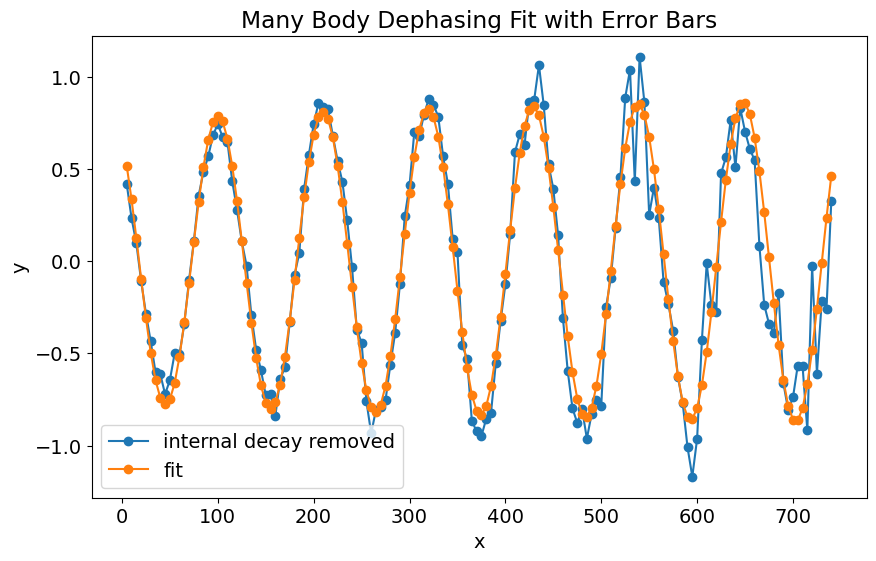

In [333]:
# Assuming pCov is the covariance matrix returned by curve_fit
# Extract the standard deviations (errors) of the parameters
p_errors = np.sqrt(np.diag(pCov))

# Plot the data with error bars
plt.plot(xdata_1, idata1_, '-o', label='internal decay removed')

# Plot the fit with error bars
plt.plot(xdata_1, many_body_dephasing_func(xdata_1, *p_), '-o', label='fit')

# Print all the parameters with their errors
# yscale, decay_T1, decay_mbd, freq, phase_deg, x0
print('yscale: ', p_[0], '±', p_errors[0])
print('decay_mbd: ', p_[1], '±', p_errors[1])
# print('freq: ', p_[3], '±', p_errors[3])
# print('phase_deg: ', p_[4], '±', p_errors[4])
print('x0: ', p_[2], '±', p_errors[2])

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Many Body Dephasing Fit with Error Bars')
plt.show()

### Fitting both kappa_m and kappa_s

In [227]:
def many_body_dephasing_func(x, *p, args = [alpha, p_ramsey[1], p_ramsey[2]]):
    yscale, decay_T1, decay_mbd, x0 = p
    alpha , freq, phase_deg = args
    return yscale * (np.sin(2 * np.pi * freq * x + phase_deg * np.pi / 180) 
                     * np.exp(-alpha* np.exp(-1* (x - x0) / decay_T1) * (x - x0) / decay_mbd))

def fit_many_body_dephasing(xdata, ydata, fitparams=None, bounds=(-np.inf, np.inf)):
    if fitparams is None:
        fitparams = [np.max(ydata), 1000, 1000, 0.1, 0, 0]

    try:
        # print(fitparams)
        # print(xdata.shape, ydata.shape)
        # print(bounds)
        avg_deviation = 1
        while avg_deviation > 0.2:
            pOpt, pCov = sp.optimize.curve_fit(many_body_dephasing_func, xdata, ydata, p0=fitparams, bounds=bounds, maxfev=10000)

            avg_deviation = np.mean(np.abs(ydata - many_body_dephasing_func(xdata, *pOpt)))
            # randomly perturb the initial guess with positive or negative
            fitparams = pOpt 
            print(avg_deviation)
            print(fitparams)
    except RuntimeError:
        print('Error - curve_fit failed')
        pOpt = fitparams
        pCov = np.zeros((len(fitparams), len(fitparams)))
    return pOpt, pCov

# Example usage
T1s = [358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2]
T2s = df_t2_and_echo[(df_t2_and_echo['type'] == 'T2')]['t2'].values

# Define bounds for the parameters
lower_bounds = [0.3, 10,10 ,  -300]
upper_bounds = [8, max(T1s), max(T2s), 300]

# Fit the data with bounds
p_, pCov_ = fit_many_body_dephasing(xdata_1, idata1_, fitparams=[1, 200, 1000,  -30], bounds=(lower_bounds, upper_bounds))

0.12753867983535108
[  0.88674623  32.7627651   14.93970767 -27.55935824]


yscale:  0.8867462291306181 ± 7.733118747547055
decay_T1:  32.76276510312704 ± 1.4812668116636866e-05
decay_mbd:  14.939707666918679 ± 1.3987311323249314
x0:  -27.55935824236356 ± 21.497075772041903


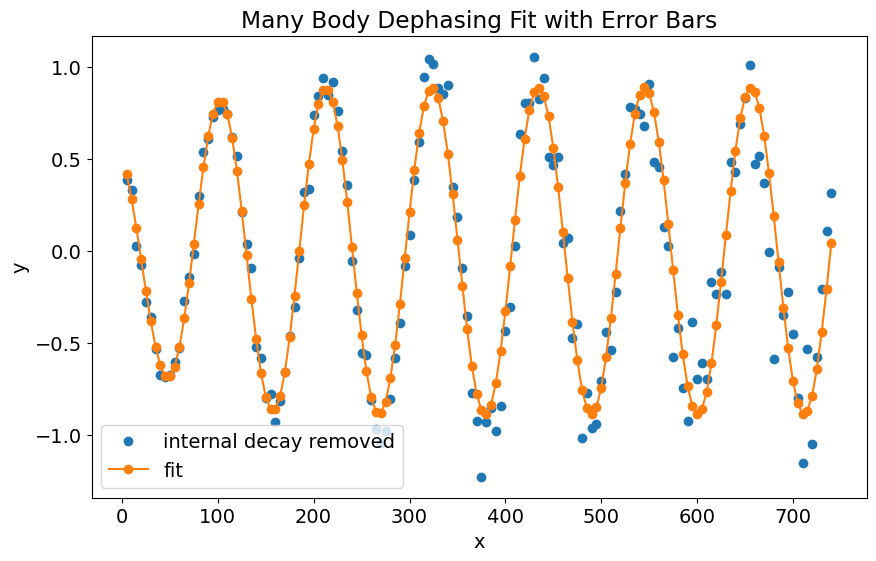

In [228]:
# Assuming pCov is the covariance matrix returned by curve_fit
# Extract the standard deviations (errors) of the parameters
p_errors = np.sqrt(np.diag(pCov))

# Plot the data with error bars
plt.plot(xdata_1, idata1_, 'o', label='internal decay removed')

# Plot the fit with error bars
plt.plot(xdata_1, many_body_dephasing_func(xdata_1, *p_), '-o', label='fit')

# Print all the parameters with their errors
# yscale, decay_T1, decay_mbd, freq, phase_deg, x0
print('yscale: ', p_[0], '±', p_errors[0])
print('decay_T1: ', p_[1], '±', p_errors[1])
print('decay_mbd: ', p_[2], '±', p_errors[2])
# print('freq: ', p_[3], '±', p_errors[3])
# print('phase_deg: ', p_[4], '±', p_errors[4])
print('x0: ', p_[3], '±', p_errors[3])

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Many Body Dephasing Fit with Error Bars')
plt.show()

### Old analysis

In [115]:
def many_body_dephasing_func(x, *p):
    yscale, decay_T1, decay_mbd, freq, phase_deg, x0 = p
    return yscale * (np.sin(2 * np.pi * freq * x + phase_deg * np.pi / 180) 
                     * np.exp(-1* np.exp(-1* (x - x0) / decay_T1) * (x - x0) / decay_mbd))

def fit_many_body_dephasing(xdata, ydata, fitparams=None, bounds=(-np.inf, np.inf)):
    if fitparams is None:
        fitparams = [np.max(ydata), 1000, 1000, 0.1, 0, 0]

    try:
        # print(fitparams)
        # print(xdata.shape, ydata.shape)
        # print(bounds)
        avg_deviation = 1
        while avg_deviation > 0.1:
            pOpt, pCov = sp.optimize.curve_fit(many_body_dephasing_func, xdata, ydata, p0=fitparams, bounds=bounds)

            avg_deviation = np.mean(np.abs(ydata - many_body_dephasing_func(xdata, *pOpt)))
            # randomly perturb the initial guess with positive or negative
            fitparams = pOpt + avg_deviation*pOpt*np.random.uniform(-0.5, 0.5)
            print(avg_deviation)
            print(fitparams)
    except RuntimeError:
        print('Error - curve_fit failed')
        pOpt = fitparams
        pCov = np.zeros((len(fitparams), len(fitparams)))
    return pOpt, pCov

# Example usage
T1s = [358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2]
T2s = df_t2_and_echo[(df_t2_and_echo['type'] == 'T2')]['t2'].values

# Define bounds for the parameters
lower_bounds = [0.3, 50,50 , 0.002, -180, -300]
upper_bounds = [2, max(T1s), max(T2s), 0.04, 180, 300]

# Fit the data with bounds
p, pCov = fit_many_body_dephasing(xdata_1, idata1_, fitparams=[0.9, 100, 100, 0.009, 90, -30], bounds=(lower_bounds, upper_bounds))

0.10511700433043765
[ 8.34652573e-01  5.09707841e+01  6.11179013e+01  8.80225946e-03
  1.14380347e+02 -3.67460806e+01]
0.10511700590881946
[ 9.06728147e-01  5.53784492e+01  6.64005523e+01  9.56236146e-03
  1.24257376e+02 -3.99405594e+01]
0.10511709586435587
[ 8.48459440e-01  5.18220165e+01  6.21414515e+01  8.94785456e-03
  1.16272308e+02 -3.73719066e+01]
0.10511645019355133
[ 8.41859331e-01  5.14119828e+01  6.16277436e+01  8.87824036e-03
  1.15367531e+02 -3.70907689e+01]
0.10511683896003843
[ 8.58295159e-01  5.24135029e+01  6.28424388e+01  9.05158994e-03
  1.17620231e+02 -3.77905851e+01]
0.10511695943059551
[ 8.32425694e-01  5.08408736e+01  6.09566485e+01  8.77876665e-03
  1.14074974e+02 -3.66738956e+01]
0.10511656941646427
[ 8.83715798e-01  5.39672517e+01  6.46966703e+01  9.31965988e-03
  1.21103573e+02 -3.89230929e+01]
0.1051170351539289
[ 8.64496302e-01  5.27954998e+01  6.33043916e+01  9.11699355e-03
  1.18470104e+02 -3.80699683e+01]
0.1051171102715698
[ 8.75703727e-01  5.34819192e+

KeyboardInterrupt: 

In [112]:
np.random.uniform(-0.05, 0.05)
#

0.032647858076105804

In [107]:
# check whether p is within bounds
print(p)
print(lower_bounds)
print(upper_bounds)
for i in range(len(p)):
    if p[i] < lower_bounds[i] or p[i] > upper_bounds[i]:
        print('not within bounds')  
        

[0.9, 100, 100, 0.009, 90, -30]
[0.3, 177.85, 50, 0.002, -180, -300]
[2, 1254.8, 1071.0700788320455, 0.04, 180, 300]
not within bounds


yscale:  0.30000000000128557
decay_T1:  330.4367476703105
decay_mbd:  50.000000002257046
freq:  0.024919442662766102
phase_deg:  3.2599886008326915
x0:  -8.760198665741216


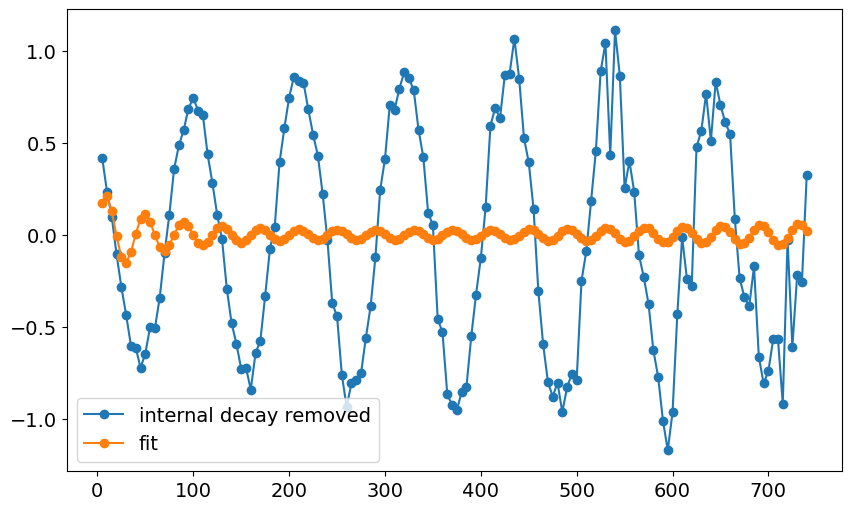

In [72]:
plt.plot(xdata_1, idata1_, '-o', label='internal decay removed')
plt.plot(xdata_1, many_body_dephasing_func(xdata_1, *p), '-o', label='fit')
# print all the parameters
# yscale, decay_T1, decay_mbd, freq, phase_deg, x0
print('yscale: ', p[0])
print('decay_T1: ', p[1])
print('decay_mbd: ', p[2])
print('freq: ', p[3])
print('phase_deg: ', p[4])
print('x0: ', p[5])
plt.legend()


In [104]:
p

[0.9, 100, 100, 0.009, 90, -30]

In [57]:
p

array([ 3.13767059e+02,  9.12452799e-03,  1.21301781e+02,  4.78398801e+02,
       -2.72890935e+01, -1.70560938e+02])

### Manual FItting

Text(0.5, 0.98, 'T_mbd=500 mus')

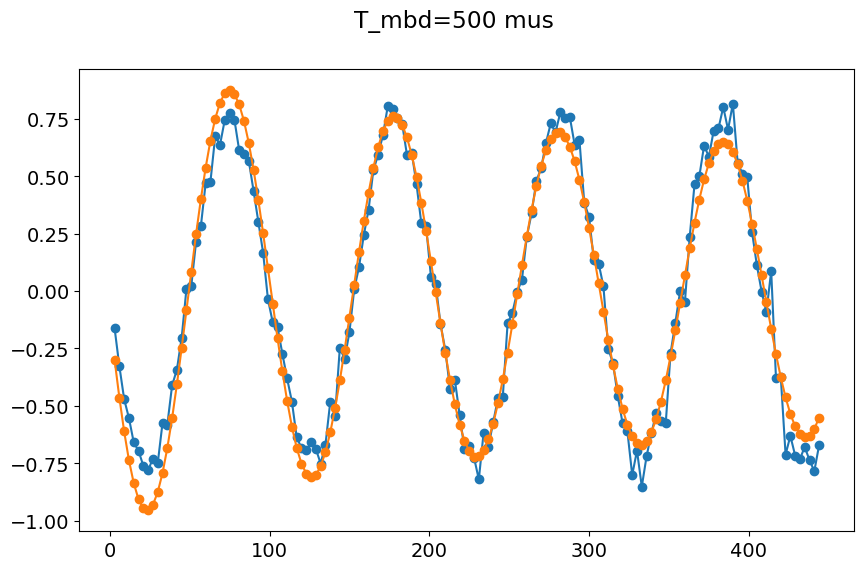

In [316]:
def many_body_dephasing_func(x, *p):
    '''
    $f(t) = e^{-\kappa_{int} t} e^{e^{-\kappa_{s} t} \kappa_m t}$ cos($\omega t$)
    without kappa_int decay
    '''
    yscale, decay_T1, decay_mbd, freq, phase_deg, x0 = p
    return yscale * (np.sin(2 * np.pi * freq * x + phase_deg * np.pi / 180) 
                     * np.exp(-1* np.exp(-1* (x - x0) / decay_T1) * (x - x0) / decay_mbd))

# manual fitting
yscale = 1#p_[0]#0.8278143110603906
decay_T1 = np.mean(T1s_eff)
decay_mbd = 500
freq = p_ramsey[1]
phase_deg = p_ramsey[2]
x0 = 0#p_[3]

p_ = [yscale, decay_T1, decay_mbd, freq, phase_deg, x0]
plt.plot(xdata_1, idata1_, '-o', label='internal decay removed')
plt.plot(xdata_1, many_body_dephasing_func(xdata_1, *p_), '-o', label='fit')
plt.suptitle('T_mbd=' + str(decay_mbd) + ' mus')


## reeating the experiment but with smaller domain (time range)

No echoes in the data
Attempted to init fitparam 4 to -52.3769361300025, which is out of bounds -402.65909090909093 to -325.543093270366. Instead init to -364.10109208972847
Attempted to init fitparam 4 to -364.10109208972847, which is out of bounds 368.5343882479175 to 459.75810853628633. Instead init to 414.14624839210194
Current pi pulse frequency: 1977.7
Fit frequency from I [MHz]: 0.03255919698408584 +/- 0.008872435294071543
Suggested new pi pulse frequency from fit I [MHz]:
 	1974.732559196984
 	1974.667440803016
T2 Ramsey from fit I [us]: 118.87153669253003
Fit frequency from Q [MHz]: 0.029403845924749518 +/- 0.000988796482608455
Suggested new pi pulse frequencies from fit Q [MHz]:
 	1974.7294038459247
 	1974.6705961540754
T2 Ramsey from fit Q [us]: 118.80000000000001


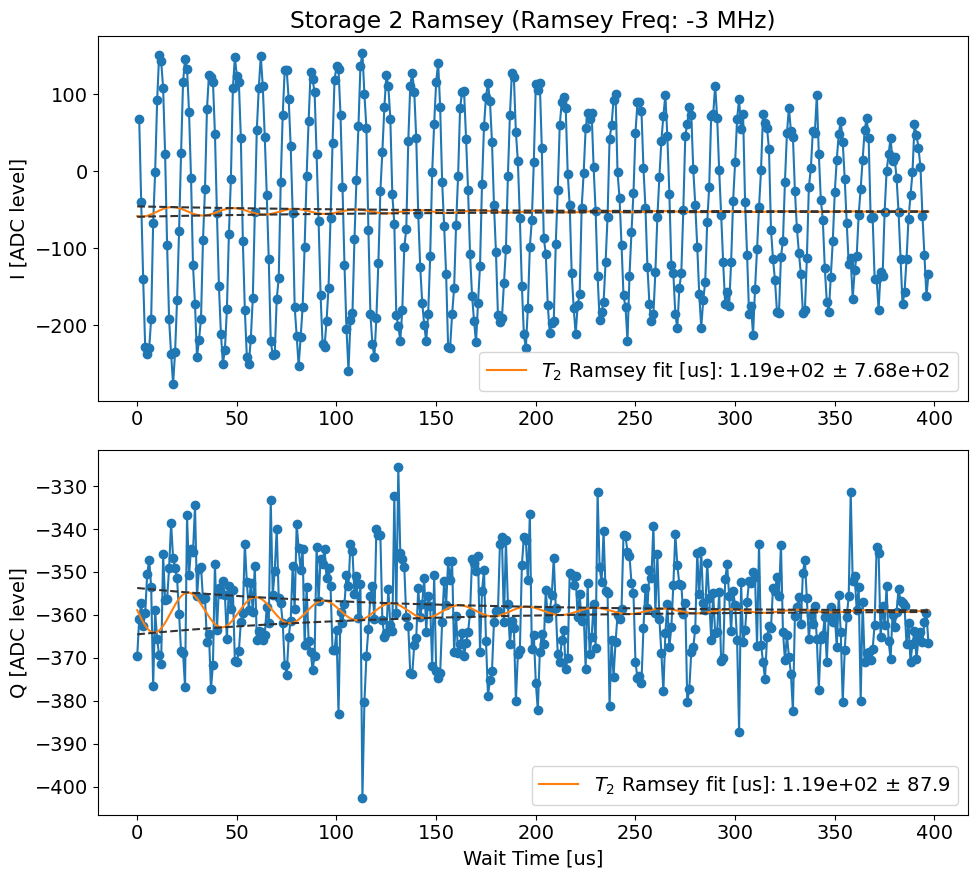

In [428]:
temp_data, attrs = prev_data(expt_path, '00231_CavityRamseyExperiment.h5')
return_args = Ramsey_display(temp_data, attrs, ramsey_freq=attrs['config']['expt']['ramsey_freq'], 
                                    active_reset=True, threshold=attrs['config']['device']['readout']['threshold'][0], readouts_per_rep=4, 
                                    initial_freq=attrs['config']['expt']['user_defined_pulse'][1], fit=True, 
                                    fitparams=[300, 0.03, None, None, None, None],
                                      title=f'Storage {mode_no} Ramsey', end_idx = -1)


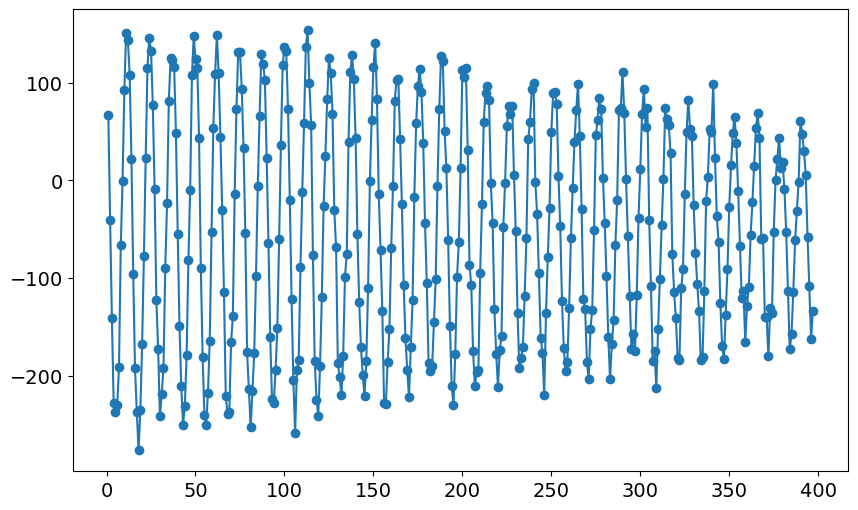

In [429]:
# collect retur args
p, pCov, xdata_1, idata1 = return_args
plt.plot(xdata_1, idata1, '-o', label='original')

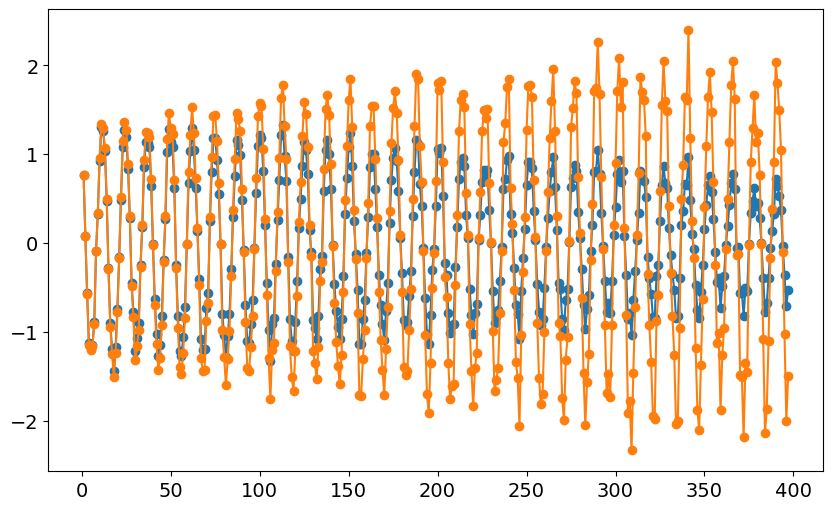

In [430]:
mode_no = 2
t2_df_idx = df_t2_and_echo[(df_t2_and_echo['target'] == mode_no) & (df_t2_and_echo['type'] == 'T2')].index[0]
t2 = df_t2_and_echo.loc[t2_df_idx, 't2']

factor = np.exp(xdata_1/t2)
# rescale y data
idata1 = (idata1 - p[4])/p[0]

idata1_ = np.array(idata1) * factor



# get rid of oscillations
# idata2_= idata1_/np.sin(p[1]*xdata_1 *2*np.pi +p[2]*np.pi/180)
# # remove outliers (things larger than 1)
# idata2_[idata2_>1] = 1
# idata2_[idata2_<-1] = -1

plt.plot(xdata_1, idata1, '-o', label='original')
plt.plot(xdata_1, idata1_, '-o', label='internal decay removed')

In [432]:
df_t2_and_echo

,target,type,file_no,name,t2,t2_err,return_args
0,1,T2,90,_stor_cavity_ramsey_sweep.h5,235.687931,7.102034,"[[1.8099999999999998, 3.6099999999999994, 5.40..."
1,1,T2_echo,91,_stor_cavity_ramsey_sweep.h5,551.567706,16.846464,"[[3.02, 6.02, 9.02, 12.02, 15.02, 18.02, 21.02..."
2,2,T2,92,_stor_cavity_ramsey_sweep.h5,378.310633,15.076063,"[[6.01, 12.01, 18.01, 24.01, 30.01, 36.01, 42...."
3,2,T2_echo,93,_stor_cavity_ramsey_sweep.h5,1493.194215,53.469139,NaN
4,3,T2,94,_stor_cavity_ramsey_sweep.h5,677.194120,16.847612,"[[4.81, 9.61, 14.409999999999998, 19.21, 24.01..."
5,3,T2_echo,95,_stor_cavity_ramsey_sweep.h5,1309.914525,41.804243,"[[8.02, 16.02, 24.02, 32.02, 40.02, 48.02, 56...."
6,4,T2,96,_stor_cavity_ramsey_sweep.h5,806.227803,23.684860,"[[4.21, 8.41, 12.610000000000001, 16.810000000..."
7,4,T2_echo,97,_stor_cavity_ramsey_sweep.h5,972.376941,29.846202,"[[7.02, 14.02, 21.02, 28.02, 35.02, 42.02, 49...."
8,5,T2,98,_stor_cavity_ramsey_sweep.h5,591.843259,15.246132,"[[3.6099999999999994, 7.209999999999999, 10.80..."
9,5,T2_echo,99,_stor_cavity_ramsey_sweep.h5,663.338928,22.742345,"[[6.02, 12.02, 18.02, 24.02, 30.02, 36.02, 42...."


In [483]:
# select only rows with type T2
df_t2_and_echo[df_t2_and_echo['type'] == 'T2']['t2'].values

array([ 235.68793121,  378.31063271,  677.19411992,  806.22780296,
        591.84325896, 1071.07007883,  663.54407829])

In [431]:
t2

378.3106327148159

In [393]:
temp_data.keys()

dict_keys(['amps', 'avgi', 'avgq', 'idata', 'phases', 'qdata', 'xpts', 'fit_avgi', 'fit_avgq', 'fit_amps', 'fit_err_avgi', 'fit_err_avgq', 'fit_err_amps', 'f_adjust_ramsey_avgi', 'f_adjust_ramsey_avgq', 'f_adjust_ramsey_amps'])

In [391]:
len(temp_data['idata'])

40400

In [390]:
attrs['config']['expt']

{'start': 0.01,
 'step': 1,
 'expts': 101,
 'ramsey_freq': -2.96,
 'reps': 100,
 'rounds': 1,
 'qubits': [0],
 'checkEF': False,
 'f0g1_cavity': 0,
 'init_gf': False,
 'active_reset': True,
 'man_reset': True,
 'storage_reset': True,
 'user_defined_pulse': [False, 1977.7, 15000, 0.005, 0.550453, 0],
 'parity_meas': False,
 'man_idx': 1,
 'storage_ramsey': [True, 2, True],
 'man_ramsey': [False, 1],
 'coupler_ramsey': False,
 'custom_coupler_pulse': [[944.25],
  [1000],
  [0.316677658],
  [0],
  [1],
  ['flat_top'],
  [0.005]],
 'echoes': [False, 0],
 'prepulse': True,
 'postpulse': True,
 'pre_sweep_pulse': [[3568.1515953227604,
   3425.5564066067,
   2007.0,
   349.415,
   3568.1515953227604,
   3425.5564066067,
   2007.0,
   696.665,
   3568.1515953227604,
   3425.5564066067,
   2007.0,
   875.845,
   3568.1515953227604,
   3425.5564066067,
   2007.0,
   1053.395,
   3568.1515953227604,
   3425.5564066067,
   2007.0,
   1245.16,
   3568.1515953227604,
   3425.5564066067,
   2007.0,
 

## Comparing curves but also redoing ramsey analysis

No echoes in the data
Attempted to init fitparam 1 to 0.03, which is out of bounds 0.00010629251700680273 to 0.01594387755102041. Instead init to 0.008025085034013606
Attempted to init fitparam 4 to -79.08455850586299, which is out of bounds -388.07549687154955 to -333.1136363636364. Instead init to -360.59456661759293
Attempted to init fitparam 4 to -360.59456661759293, which is out of bounds 377.85988307413044 to 449.8849368080816. Instead init to 413.872409941106
Current pi pulse frequency: 1977.7
Fit frequency from I [MHz]: 0.006927486913639576 +/- 5.6432191858049024e-06
Suggested new pi pulse frequency from fit I [MHz]:
 	1975.1769274869137
 	1975.1630725130865
T2 Ramsey from fit I [us]: 677.9198784048814
Fit frequency from Q [MHz]: 0.008025085034013606 +/- inf
Suggested new pi pulse frequencies from fit Q [MHz]:
 	1975.178025085034
 	1975.161974914966
T2 Ramsey from fit Q [us]: 940.8


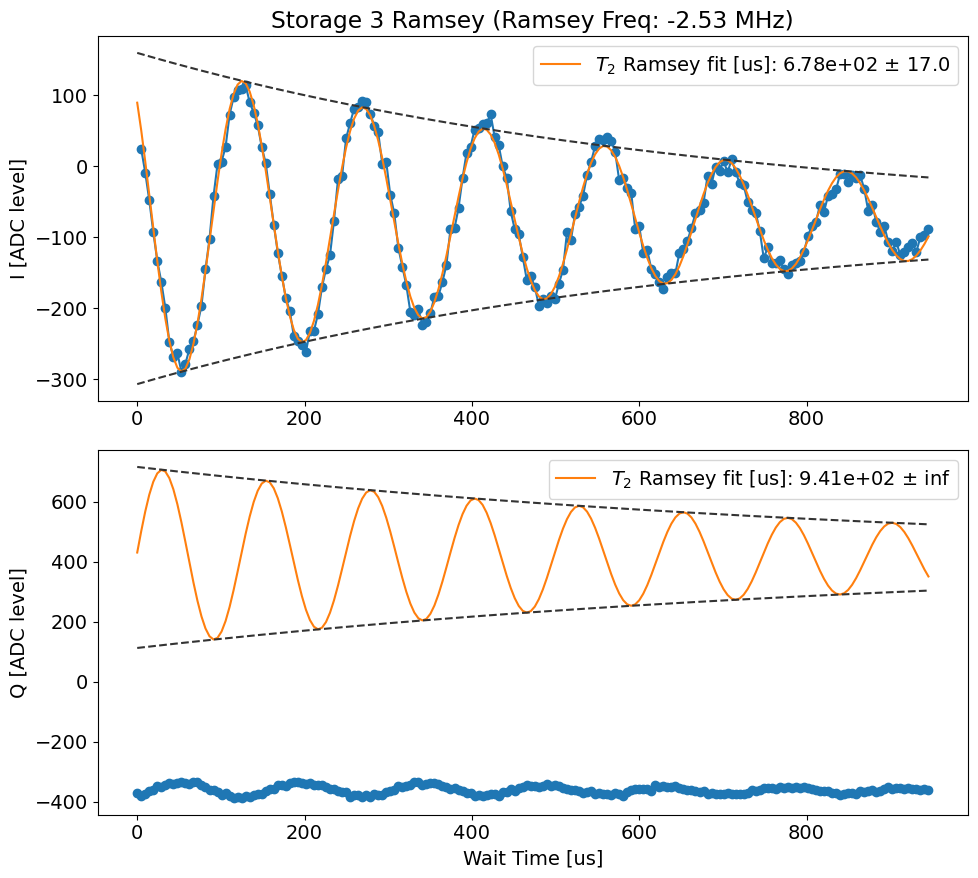

In [473]:
df_idx = 12
file_no = df_MBD.loc[df_idx, 'file_no']
name = df_MBD.loc[df_idx, 'name']
mode_no = df_MBD.loc[df_idx, 'target']
state_idx = df_MBD.loc[df_idx, 'state_idx']


temp_data, attrs = prev_data(expt_path, f'{file_no:05d}{name}')
return_args = Ramsey_display(temp_data, attrs, ramsey_freq=attrs['config']['expt']['ramsey_freq'],
                                    active_reset=True, threshold=attrs['config']['device']['readout']['threshold'][0], readouts_per_rep=4,
                                    initial_freq=attrs['config']['expt']['user_defined_pulse'][1], fit=True,
                                    fitparams=[300, 0.03, None, None, None, None],
                                    title=f'Storage {mode_no} Ramsey', end_idx = -1)
p, pCov, x_data, i_data = return_args

In [477]:
p

array([ 2.63434520e+02,  6.92748691e-03,  1.35608355e+02,  6.77919878e+02,
       -7.34795529e+01, -8.30703760e+01])

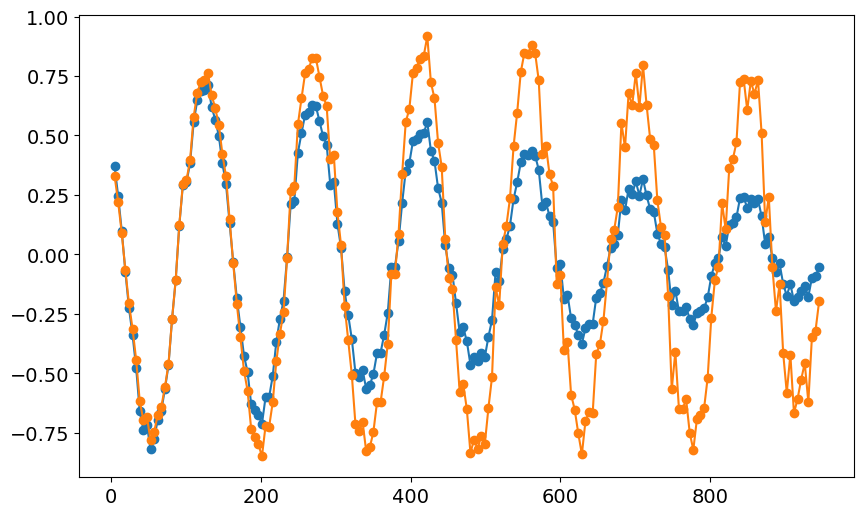

In [479]:
# rescale y data
i_data_rs = (i_data - p[4])/p[0]
plt.plot(x_data, i_data_rs, '-o', label='rescaled')

# # fitparams=[amp, freq (non-angular), phase (deg), decay time, amp offset, decay time offset]
factor = np.exp((x_data + p[-1])/p[3])
i_data_rs_no_decay = i_data_rs * factor
plt.plot(x_data, i_data_rs_no_decay, '-o', label='rescaled no decay')


## Comparing Curves

In [ ]:
df = 12

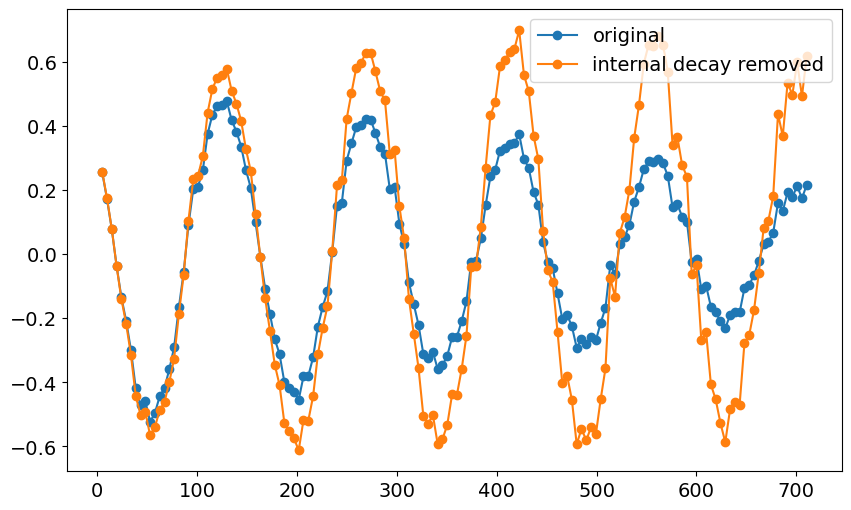

In [445]:
df_idx = 12
file_no = df_MBD.loc[df_idx, 'file_no']
name = df_MBD.loc[df_idx, 'name']
mode_no = df_MBD.loc[df_idx, 'target']
state_idx = df_MBD.loc[df_idx, 'state_idx']

spectator_cross_kerrs = np.abs(cross_kerrs[mode_no-1])
T1s = np.array([358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2])
kappa = np.sum(1/T1s * np.abs(spectator_cross_kerrs/np.sum(spectator_cross_kerrs)))
effective_spec_T1 = 1/kappa

if state_idx == 0:
    alpha =0
elif state_idx == 1:
    alpha = 1
else:
    alpha = 1/2

xdata_1, idata1 = df_MBD.loc[df_idx, 'xdata'], df_MBD.loc[df_idx, 'idata']
p, pCov = df_MBD.loc[df_idx, 'p'], df_MBD.loc[df_idx, 'pCov']

#  # fitparams=[amp, freq (non-angular), phase (deg), decay time, amp offset, decay time offset]

#get rid of amp offset and amp 
idata1 = (idata1 - p[4])/p[0]
# plt.plot(xdata_1, idata1, '-o', label='original')

# get rid of internal kappa decay 

## find df_idx in the t2_and_echo dataframe with target being mode_no and type being T2
t2_df_idx = df_t2_and_echo[(df_t2_and_echo['target'] == mode_no) & (df_t2_and_echo['type'] == 'T2')].index[0]
t2 = df_t2_and_echo.loc[t2_df_idx, 't2']

factor = np.exp(xdata_1/t2)
idata1_ = np.array(idata1) * factor



# get rid of oscillations
# idata2_= idata1_/np.sin(p[1]*xdata_1 *2*np.pi +p[2]*np.pi/180)
# # remove outliers (things larger than 1)
# idata2_[idata2_>1] = 1
# idata2_[idata2_<-1] = -1

plt.plot(xdata_1, idata1, '-o', label='original')
plt.plot(xdata_1, idata1_, '-o', label='internal decay removed')
# plt.plot(xdata_1, idata2_, '-o', label='oscillations removed')
plt.legend()
p_ramsey = p.copy()


In [450]:
df_idx = 14
file_no = df_MBD.loc[df_idx, 'file_no']
name = df_MBD.loc[df_idx, 'name']
mode_no = df_MBD.loc[df_idx, 'target']
state_idx = df_MBD.loc[df_idx, 'state_idx']

spectator_cross_kerrs = np.abs(cross_kerrs[mode_no-1])
T1s = np.array([358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2])
kappa = np.sum(1/T1s * np.abs(spectator_cross_kerrs/np.sum(spectator_cross_kerrs)))
effective_spec_T1 = 1/kappa

if state_idx == 0:
    alpha =0
elif state_idx == 1:
    alpha = 1
else:
    alpha = 1/2

xdata_2, idata2 = df_MBD.loc[df_idx, 'xdata'], df_MBD.loc[df_idx, 'idata']
p, pCov = df_MBD.loc[df_idx, 'p'], df_MBD.loc[df_idx, 'pCov']

#  # fitparams=[amp, freq (non-angular), phase (deg), decay time, amp offset, decay time offset]

#get rid of amp offset and amp 
idata2 = (idata2 - p[4])/p[0]
# plt.plot(xdata_1, idata1, '-o', label='original')

# get rid of internal kappa decay 

## find df_idx in the t2_and_echo dataframe with target being mode_no and type being T2
t2_df_idx = df_t2_and_echo[(df_t2_and_echo['target'] == mode_no) & (df_t2_and_echo['type'] == 'T2')].index[0]
t2 = df_t2_and_echo.loc[t2_df_idx, 't2']

factor = np.exp(xdata_1/t2)
idata2_ = np.array(idata2) * factor



# get rid of oscillations
# idata2_= idata1_/np.sin(p[1]*xdata_1 *2*np.pi +p[2]*np.pi/180)
# # remove outliers (things larger than 1)
# idata2_[idata2_>1] = 1
# idata2_[idata2_<-1] = -1

# plt.plot(xdata_1, idata1, '-o', label='original')
# plt.plot(xdata_1, idata1_, '-o', label='internal decay removed')
# # plt.plot(xdata_1, idata2_, '-o', label='oscillations removed')
# plt.legend()
# p_ramsey = p.copy()


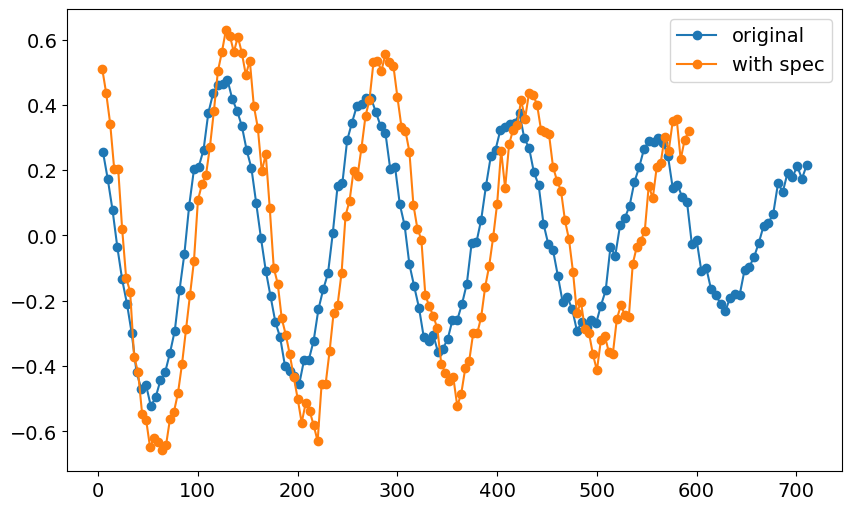

In [451]:
plt.plot(xdata_1, idata1, '-o', label='original')
plt.plot(xdata_2, idata2, '-o', label='with spec')
plt.legend()

In [449]:
alpha

1

## Qubit Manipulate expts

No echoes in the data
Attempted to init fitparam 1 to 0.07908163265306122, which is out of bounds 0.0002564102564102564 to 0.038461538461538464. Instead init to 0.01935897435897436
Attempted to init fitparam 1 to 0.07653061224489795, which is out of bounds 0.0002564102564102564 to 0.038461538461538464. Instead init to 0.01935897435897436
Attempted to init fitparam 1 to 0.07653061224489795, which is out of bounds 0.0002564102564102564 to 0.038461538461538464. Instead init to 0.01935897435897436
Current pi pulse frequency: 3568.1515953227604
Fit frequency from I [MHz]: 0.01935897435897436 +/- inf
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.2122363484013
 	3568.2509542971193
T2 Ramsey from fit I [us]: 390.0
Fit frequency from Q [MHz]: 0.019347284802061788 +/- 0.003254818344288998
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.2122480379585
 	3568.2509426075626
T2 Ramsey from fit Q [us]: 140.14446123423073


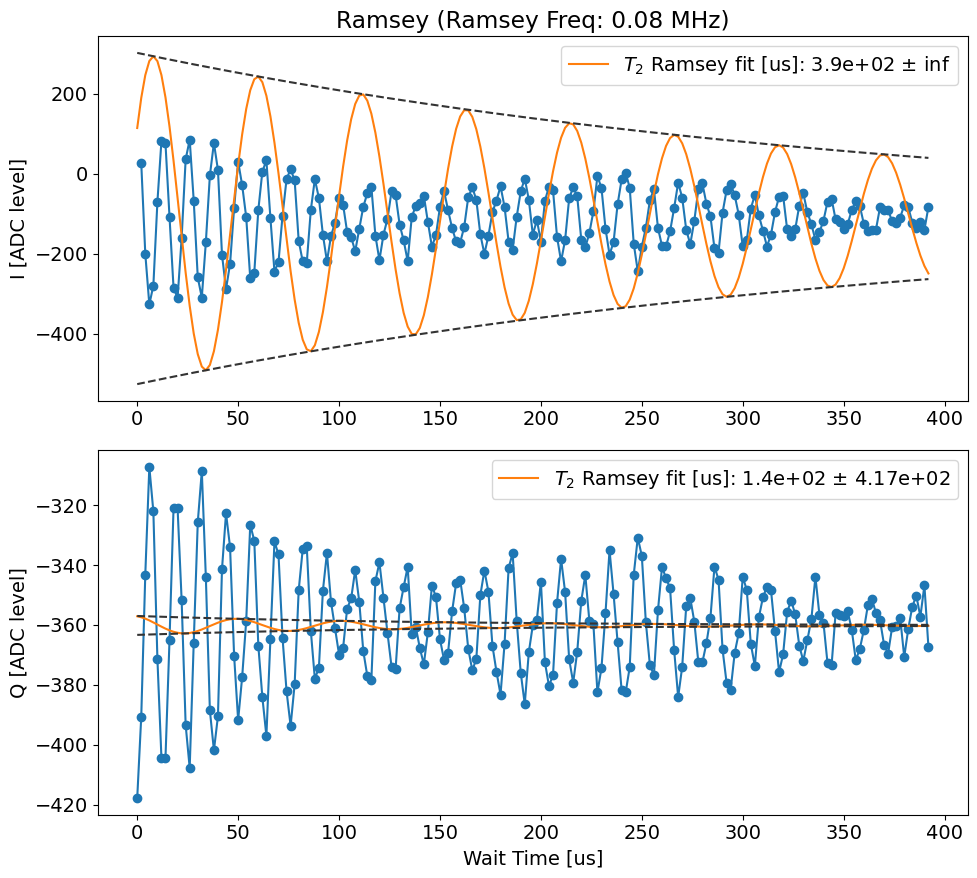

In [465]:
# bare qubit ramsey
temp_data, attrs = prev_data(expt_path, '00056_RamseyExperiment.h5')
return_args1 = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=True, threshold = -25.73026268397916, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ge_idle'][0], fit=True, title='Ramsey',
                end_idx = -1)
#collect return args
p, pCov, xdata_1, idata1 = return_args1

osc_freq = 0.07911063060839033
qubit_t2 = 99.03023337204115

No echoes in the data
Attempted to init fitparam 1 to 0.07908163265306122, which is out of bounds 0.0002564102564102564 to 0.038461538461538464. Instead init to 0.01935897435897436
Attempted to init fitparam 1 to 0.07653061224489795, which is out of bounds 0.0002564102564102564 to 0.038461538461538464. Instead init to 0.01935897435897436
Attempted to init fitparam 1 to 0.07653061224489795, which is out of bounds 0.0002564102564102564 to 0.038461538461538464. Instead init to 0.01935897435897436
Current pi pulse frequency: 3568.1515953227604
Fit frequency from I [MHz]: 0.02232734003274188 +/- 0.003642472590982329
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.209267982728
 	3568.2539226627932
T2 Ramsey from fit I [us]: 117.00000691587799
Fit frequency from Q [MHz]: 0.017329291210105027 +/- 0.0058363084095736355
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.2142660315503
 	3568.2489246139703
T2 Ramsey from fit Q [us]: 120.6423978078915


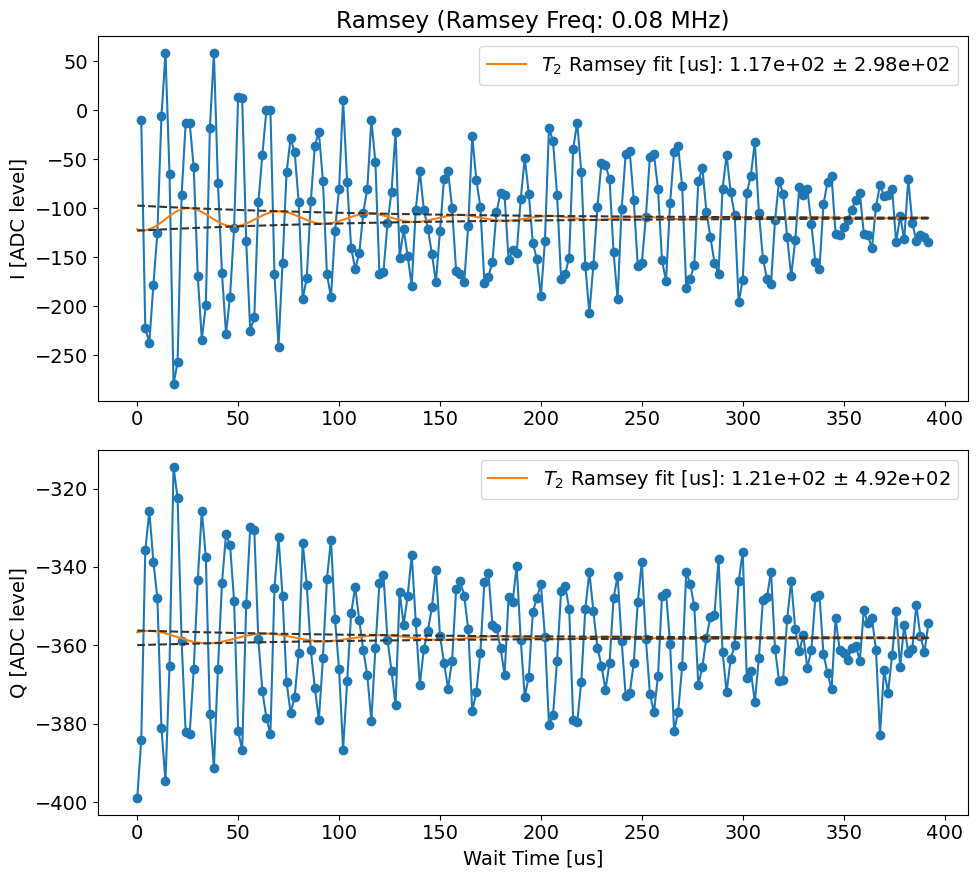

In [466]:
# qubit ramsey with man1 occupied
temp_data, attrs = prev_data(expt_path, '00057_RamseyExperiment.h5')
return_args2 = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=True, threshold = -25.73026268397916, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ge_idle'][0], fit=True, title='Ramsey',
                end_idx = -1)
#collect return args
p, pCov, xdata_2, idata2 = return_args2

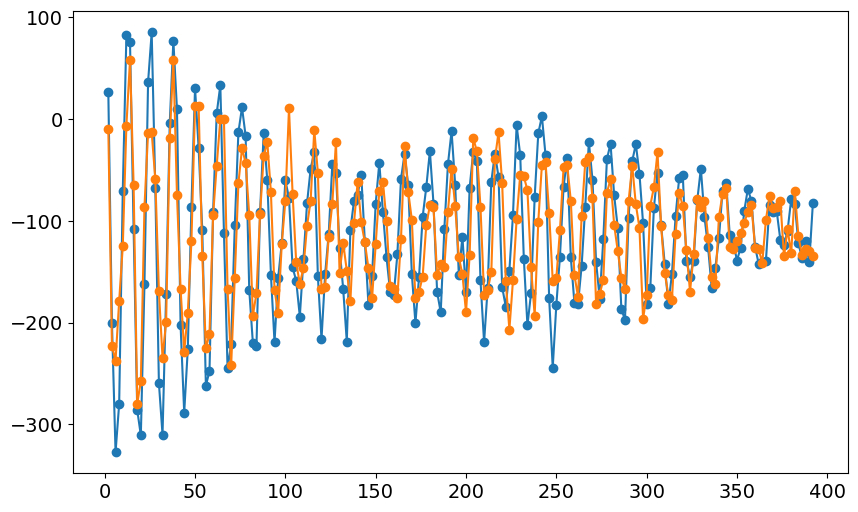

In [470]:
plt.plot(xdata_1, idata1, '-o', label='bare qubit')
plt.plot(xdata_2, idata2, '-o', label='man1 occupied')

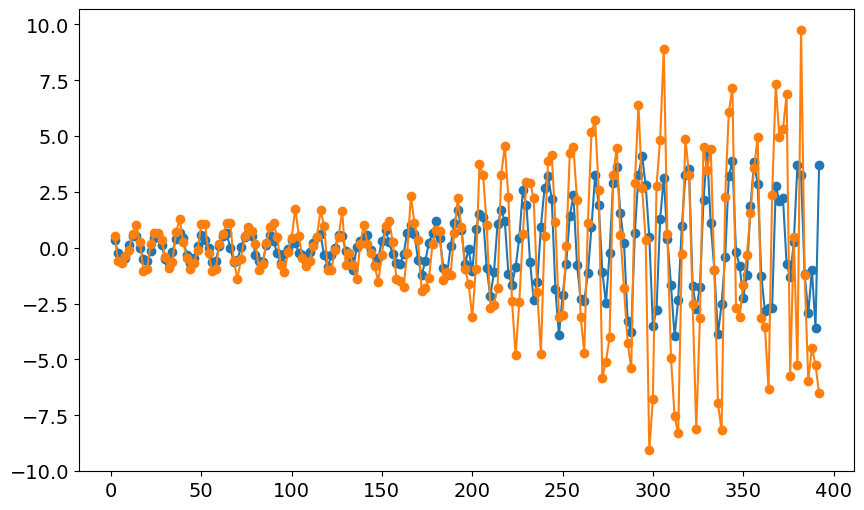

In [471]:
# collect return args
p1, pCov1, xdata_1, idata1 = return_args1
p2, pCov2, xdata_2, idata2 = return_args2

# rescale data
idata1 = (idata1 - p1[4])/p1[0]
idata2 = (idata2 - p2[4])/p2[0]


# getting rid of internal decay
factor1 = np.exp(xdata_1/qubit_t2)
idata1_ = np.array(idata1) * factor1

factor2 = np.exp(xdata_2/qubit_t2)
idata2_ = np.array(idata2) * factor2

plt.plot(xdata_1, idata1_, '-o', label='bare qubit internal decay removed')
plt.plot(xdata_2, idata2_, '-o', label='man1 occupied internal decay removed')

# simulation 
Let's see how the ramsey signal would look like if things followed the model

$f(t) = e^{-\kappa_{int} t} e^{e^{-\kappa_{s} t} \kappa_m t}$ cos($\omega t$)

where 
- $\kappa_{int}$ is the intrinsic dephasing rate (T2)
- $\kappa_{s}$ is the T1 decay (average) of spectator storage modes
- $\kappa_m$ is the effective many body dephasing rate
- $\omega$ is the ramsey frequency

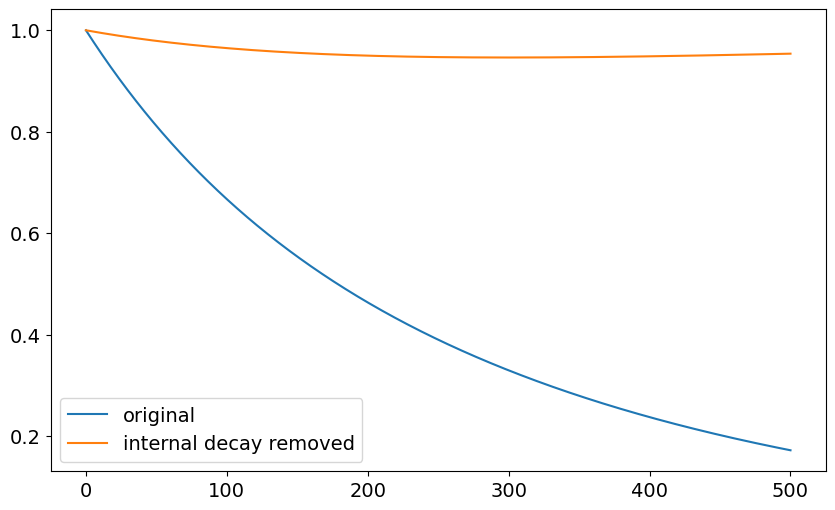

In [452]:
kappa_int = 1/(300) # internal kappa Mhz  
kappa_s = 1/(300) # T1
kappa_mbd = 1/(1000) # MBD
omega = 2*np.pi*0#*0.02
alpha = 0.5

def fit_func(t, include_int_kappa = True):

    '''$f(t) = e^{-\kappa_{int} t} e^{e^{-\kappa_{s} t} \kappa_m t}$ cos($\omega t$)'''
    if include_int_kappa:
        return np.exp(-kappa_int*t)*np.exp(-1 *np.exp(-kappa_s*t)*kappa_mbd*t)*np.cos(omega*t)
    else:
        return np.exp(-1 *alpha *np.exp(-kappa_s*t)*kappa_mbd*t)*np.cos(omega*t)

t= np.linspace(0, 500, 1000)
plt.plot(t, fit_func(t), label='original')
plt.plot(t, fit_func(t, include_int_kappa=False), label='internal decay removed')
plt.legend()
